# Example 4 Getting PPPC4DMID Data

The Poor Particle Physicists' Cookbook for Dark Matter Indirect Detection (PPPC4DMID) [[1]](#cite_PPPC), provides a table of fluxes at production for dark matter annihilation into all Standard Model fundamental particles [[2]](#cite_weakCorrections),  which then subsequently decay promptly into stable particles. We provide the spectra of produced $e^+e^-$ and photons for use as inputs into DarkHistory. 

## Notebook Initialization

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:280: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib


In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np
import darkhistory.spec.pppc as pppc
from config import load_data

## Spectra

First, we define the abscissa at which we want to obtain the spectrum. We shall use the default abscissa used in DarkHistory that is required for use with the provided transfer functions. 

In [4]:
binning = load_data('binning')

photeng = binning['phot']
eleceng = binning['elec']

Next, we call the function [*pppc.get_pppc_spec()*](https://darkhistory.readthedocs.io/en/latest/_autosummary/darkhistory/spec/pppc/darkhistory.spec.pppc.get_pppc_spec.html). We have to specify: the dark matter mass $m_\text{DM}$ (in eV), the channel it promptly annihilates/decays into (e.g. $\chi \chi \to b \bar{b}$), the stable, secondary particle that we are interested in (either `phot` for photons or `elec` for $e^+e^-$), and whether we are interested in annihilation or decay (set by the `decay` flag). 

The user should refer to the documentation for a full list of allowed channels. 

The output is a `Spectrum` object (see Ex. 2 for how to use these objects) containing the spectrum as a function of kinetic energy. 

Here, we'll choose 100 GeV dark matter annihilating into $\tau^+ \tau^-$, and obtain both the photon and electron spectrum produced per annihilation. See the *Channels* section for more information on selecting other channels. 

In [5]:
mDM = 1e11
chan = 'tau'

phot_spec = pppc.get_pppc_spec(mDM, photeng, chan, 'phot', decay=False)
elec_spec = pppc.get_pppc_spec(mDM, eleceng, chan, 'elec', decay=False)

../config.py:389: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords_data = np.array(json.load(data_file))
../config.py:391: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values_data = np.array(json.load(data_file))


And a plot of the spectra. 

(0.1, 5000000000000.0, 1e-06, 300.0)

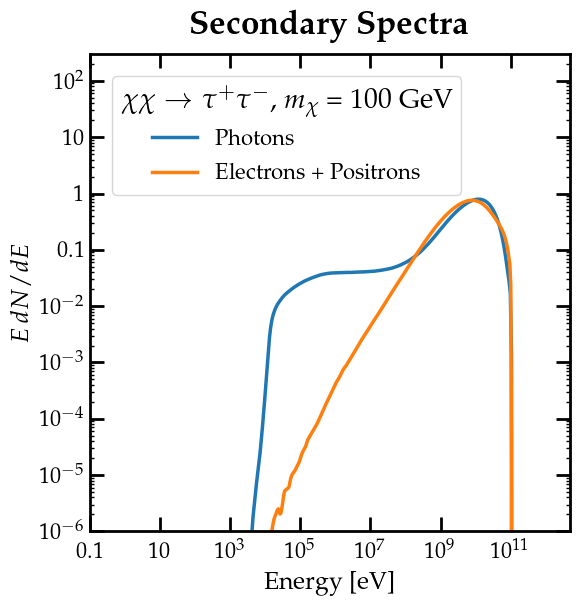

In [6]:
plt.figure()

plt.loglog()

phot_plot, = plt.plot(photeng, photeng*phot_spec.dNdE, label='Photons')
elec_plot, = plt.plot(eleceng, eleceng*elec_spec.dNdE, label=r'Electrons + Positrons')

plt.xlabel('Energy [eV]')
plt.ylabel(r'$E \, dN/dE$')
plt.title(r'\bf{Secondary Spectra}')

leg = plt.legend(handles=[phot_plot, elec_plot],loc=2)
leg.set_title(r'$\chi \chi \to \tau^+ \tau^-$, $m_\chi$ = 100 GeV')


plt.axis([1e-1, 5e12, 1e-6, 0.3e3])

Below we compute the fraction of the mass-energy of dark matter deposited into each channel. These fractions agree very well with the result obtained by numerically integrating the PPPC4DMID Mathematica interpolation tables appropriately.

In [7]:
print('Fraction of energy in photons:   ', phot_spec.toteng()/(2*mDM)) 
print('Fraction of energy in e+e-:      ', elec_spec.toteng()/(2*mDM))
print('Fraction of energy in EM states: ', phot_spec.toteng()/(2*mDM) + elec_spec.toteng()/(2*mDM))

Fraction of energy in photons:    0.15632250666571748
Fraction of energy in e+e-:       0.15711285262860017
Fraction of energy in EM states:  0.31343535929431765


## Interpolation Details

The interpolation goes from $m_\text{DM} =$ 5 GeV to 100 TeV, and $E/m_{\text{DM}} = 10^{-9}$ to $E/m_{\text{DM}} = 1$, where $E$ is the kinetic energy. Outside of this range, we set the interpolation output to a negligible but non-zero value for ease of log interpolation.

If the dark matter mass lies below the mass threshold of the products, a spectrum of zeroes is automatically returned. There is a small range of masses between some of the thresholds and the first DM mass data point where the interpolator will return an error, although this can easily be fixed in `darkhistory.spec.pppc`  if an extrapolation is desired instead. 

We use piecewise cubic Hermite interpolating polynomials (PCHIP) to interpolate first along $m_\text{DM}$ and then along $E/m_\text{DM}$. This is not exactly the same method as in the PPPC4DMID Mathematica notebook, which uses a 2D version of this interpolation method. This may result in significant differences, especially in very peaky spectra. We emphasize however that this is merely a difference in interpolation choice. 

The interpolator tries its best to maintain energy conservation even when the binning provided is very coarse. This is done by always interpolating over a very fine grid (at least 50,000 points in the interpolation range), and then reassigning the particles into the coarser binning in a way that conserves total number and total energy through the function `Spectrum.rebin()` (see Ex. 2). 

## Bibliography

[1]<a id='cite_PPPC'></a> M.Cirelli, G.Corcella, A.Hektor, G.Hütsi, M.Kadastik, P.Panci, M.Raidal, F.Sala, A.Strumia, "PPPC 4 DM ID: A Poor Particle Physicist Cookbook for Dark Matter Indirect Detection," arXiv 1012.4515, JCAP 1103 (2011) 051. Erratum: JCAP 1210 (2012) E01.

[2]<a id='cite_weakCorrections'></a> P. Ciafaloni, D. Comelli, A. Riotto, F. Sala, A. Strumia, A. Urbano, "Weak corrections are relevant for dark matter indirect detection," arXiv 1009.0224, JCAP 1103 (2011) 019 